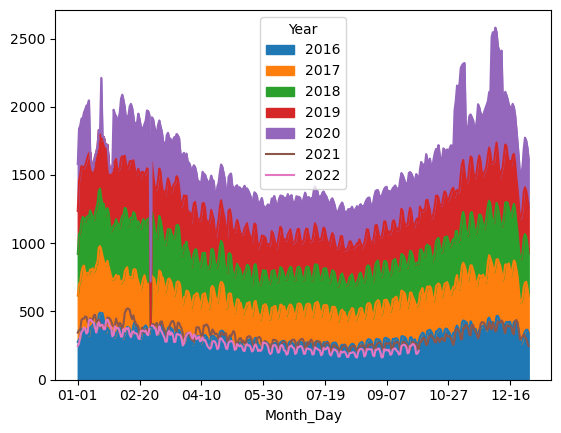

In [77]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Consumption.csv")

df['Clean_Date_1'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors = 'coerce')
df['Clean_Date_2'] = pd.to_datetime(df['Date'], format='%Y%m%d', errors='coerce')
df['Clean_Date'] = df['Clean_Date_1'].combine(df['Clean_Date_2'], lambda x, y: x if pd.notnull(x) else y)

df['Month_Day'] = df['Clean_Date'].dt.strftime('%m-%d')
df['Year'] = df['Clean_Date'].dt.strftime('%Y')

df_pivot = pd.pivot_table(df,index = 'Month_Day', columns = 'Year', values = 'Consumption', aggfunc = np.sum)

ax = df_pivot.plot(y = ['2016','2017','2018','2019','2020'], kind = 'area')
df_pivot.plot(y = ['2021','2022'], kind = 'line', ax = ax)
plt.show()